### Цель работы

Исследовать функционирование простейшей нейронной сети (НС) на базе нейрона с нелинейной функцией активации и обучить её по правилу Видроу — Хоффа

### Постановка задачи.

Получить модель булевой функции (БФ) на основе однослойной НС (единичный нейрон) с двоичными входами 𝑥1,𝑥2,𝑥3,𝑥4∈{0,1}, единичным входом смещения 𝑥0=1, синаптическими весами 𝑤0,𝑤1,𝑤2,𝑤3,𝑤4, двоичным выходом 𝑦∈{0,1} и заданной нелинейной функцией активации (ФА) 𝑓:𝑅→(0,1) (рис. 1.1).

Для заданной БФ (варианты см. в табл. 1.4) реализовать обучение НС с использованием:
1. всех комбинаций переменных 𝑥1,𝑥2,𝑥3,𝑥4;
2. части возможных комбинаций переменных 𝑥1,𝑥2,𝑥3,𝑥4;

остальные комбинации являются тестовыми.

## 8 вариант
Моделируемая БФ:

$$ f(net)= (x_1 + x_2 + x_4) * x_3 $$

**Таблица истинности**

In [13]:
from services import *
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt

truth_table = [[*x[0]] + [x[1]] for x in zip(FULL_TRAIN_DATA, FULL_EXPECTED_OUTPUT_DATA)]
pd.DataFrame(truth_table, columns=('x1', 'x2', 'x3', 'x4', 'F'))

,x1,x2,x3,x4,F
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,1,0
6,0,1,1,0,1
7,0,1,1,1,1
8,1,0,0,0,0
9,1,0,0,1,0


## Ход работы

***

## Функция активации №1 - ступенчатая

$$ f(net)= \left\{
\begin{array}{ll}
      1 & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.  $$

Динамика НС с нормой обучения η = 0.1 представлена в таблице ниже.

In [14]:
data = []
epoch_number = 0
count_errors = 1
errors = []
epochs = []
nn = NeuralNetwork(learning_rate=0.1, activation_function=first_af, derivative_function=first_df)

while count_errors:
    epoch_number += 1
    current_weights = copy(nn.weights)
    count_errors = nn.epoch(FULL_TRAIN_DATA)

    data.append([epoch_number,
                 f'({current_weights[1]:.3}, {current_weights[2]:.3}, {current_weights[3]:.3}, {current_weights[4]:.3}, {current_weights[0]:.3})',
                 f'({", ".join(map(str, nn.current_nn_output))})',
                 nn.current_error_count])
    epochs.append(epoch_number)
    errors.append(count_errors)

pd.DataFrame(data, columns=('Номер эпохи k', 'Вектор весов w', 'Выходной вектор y', 'Суммарная ошибка E'))

,Номер эпохи k,Вектор весов w,Выходной вектор y,Суммарная ошибка E
0,1,"(1.0, 1.0, 1.0, 1.0, 1.0)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
1,2,"(0.6, 0.6, 0.9, 0.6, 0.1)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
2,3,"(0.2, 0.2, 0.8, 0.2, -0.8)","(0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)",1
3,4,"(0.2, 0.2, 0.7, 0.2, -0.9)","(0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)",0


**График суммарной ошибки НС по эпохам обучения</b>

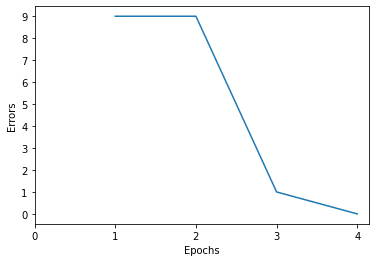

In [15]:
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.xticks([x for x in range(len(epochs) + 1)], [x for x in range(len(epochs) + 1)])
plt.yticks([x for x in range(max(errors) + 1)], [x for x in range(max(errors) + 1)])
plt.show()


**Нахождение минимальной выборки для обучения**

In [16]:
nn = NeuralNetwork(learning_rate=0.4, activation_function=first_af, derivative_function=first_df)
main_min_sample = get_min_sample(nn)
print(f'Min sample: {main_min_sample}', end='\n\n')
nn.reset()

Min sample: [[0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 0, 0]]



Динамика НС c данной минимальной выборкой с нормой обучения η = 0.4 представлена в таблице ниже.

In [17]:
data = []
epoch_number = 0
count_errors = 1
errors = []
epochs = []

while count_errors:
    epoch_number += 1
    current_weights = copy(nn.weights)
    count_errors = nn.partial_epoch(main_min_sample, set_expected_output_data(main_min_sample))
    data.append([epoch_number,
                 f'({current_weights[1]:.3}, {current_weights[2]:.3}, {current_weights[3]:.3}, {current_weights[4]:.3}, {current_weights[0]:.3})',
                 f'({", ".join(map(str, nn.current_nn_output))})',
                 nn.current_error_count])
    epochs.append(epoch_number)
    errors.append(count_errors)

pd.DataFrame(data, columns=('Номер эпохи k', 'Вектор весов w', 'Выходной вектор y', 'Суммарная ошибка E'))

,Номер эпохи k,Вектор весов w,Выходной вектор y,Суммарная ошибка E
0,1,"(1.0, 1.0, 1.0, 1.0, 1.0)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
1,2,"(0.6, 0.6, 1.0, 0.6, -0.2)","(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",8
2,3,"(0.2, 0.2, 1.0, 0.2, -1.0)","(0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)",0


**График суммарной ошибки НС с минимальной выборкой по эпохам обучения**

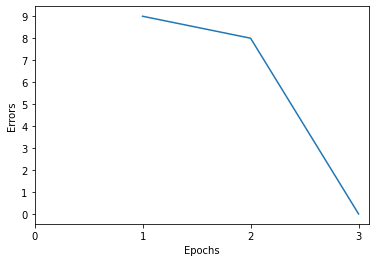

In [18]:
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.xticks([x for x in range(len(epochs) + 1)], [x for x in range(len(epochs) + 1)])
plt.yticks([x for x in range(max(errors) + 1)], [x for x in range(max(errors) + 1)])
plt.show()

***

## Функция активации №3 - логистическая (сигмоида)

$$f(net) = \dfrac{1}{1 + exp(-net)}$$

Динамика НС с нормой обучения η = 0.3 представлена в таблице ниже.

In [19]:
data = []
epoch_number = 0
count_errors = 1
errors = []
epochs = []
nn = NeuralNetwork(learning_rate=0.3, activation_function=third_af, derivative_function=third_df)

while count_errors:
    epoch_number += 1
    current_weights = copy(nn.weights)
    count_errors = nn.epoch(FULL_TRAIN_DATA)

    data.append([epoch_number,
                 f'({current_weights[1]:.3}, {current_weights[2]:.3}, {current_weights[3]:.3}, {current_weights[4]:.3}, {current_weights[0]:.3})',
                 f'({", ".join(map(str, nn.current_nn_output))})',
                 nn.current_error_count])
    epochs.append(epoch_number)
    errors.append(count_errors)

pd.DataFrame(data, columns=('Номер эпохи k', 'Вектор весов w', 'Выходной вектор y', 'Суммарная ошибка E'))


,Номер эпохи k,Вектор весов w,Выходной вектор y,Суммарная ошибка E
0,1,"(1.0, 1.0, 1.0, 1.0, 1.0)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
1,2,"(0.957, 0.955, 0.984, 0.924, 0.859)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
2,3,"(0.903, 0.899, 0.963, 0.832, 0.69)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
3,4,"(0.831, 0.826, 0.935, 0.715, 0.483)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
4,5,"(0.73, 0.722, 0.895, 0.56, 0.219)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
5,6,"(0.576, 0.563, 0.836, 0.342, -0.137)","(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",8
6,7,"(0.343, 0.318, 0.761, 0.061, -0.564)","(0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1)",3
7,8,"(0.208, 0.178, 0.691, -0.0122, -0.764)","(0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)",1
8,9,"(0.208, 0.178, 0.761, 0.0583, -0.695)","(0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)",1
9,10,"(0.208, 0.178, 0.691, 0.0583, -0.767)","(0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)",1


**График суммарной ошибки НС по эпохам обучения**

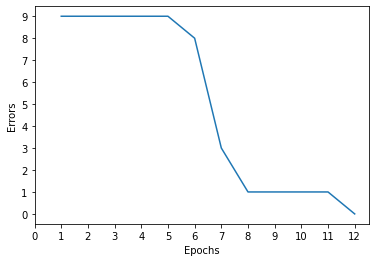

In [20]:
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.xticks([x for x in range(len(epochs) + 1)], [x for x in range(len(epochs) + 1)])
plt.yticks([x for x in range(max(errors) + 1)], [x for x in range(max(errors) + 1)])
plt.show()


**Нахождение минимальной выборки для обучения**

In [21]:
nn = NeuralNetwork(learning_rate=0.4, activation_function=third_af, derivative_function=third_df)
main_min_sample = get_min_sample(nn)
print(f'Min sample: {main_min_sample}', end='\n\n')
nn.reset()

Min sample: [[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1]]



Динамика НС c данной минимальной выборкой с нормой обучения η = 0.4 представлена в таблице ниже.

In [22]:
data = []
epoch_number = 0
count_errors = 1
errors = []
epochs = []

while count_errors:
    epoch_number += 1
    current_weights = copy(nn.weights)
    count_errors = nn.partial_epoch(main_min_sample, set_expected_output_data(main_min_sample))
    data.append([epoch_number,
                 f'({current_weights[1]:.3}, {current_weights[2]:.3}, {current_weights[3]:.3}, {current_weights[4]:.3}, {current_weights[0]:.3})',
                 f'({", ".join(map(str, nn.current_nn_output))})',
                 nn.current_error_count])
    epochs.append(epoch_number)
    errors.append(count_errors)

pd.DataFrame(data, columns=('Номер эпохи k', 'Вектор весов w', 'Выходной вектор y', 'Суммарная ошибка E'))

,Номер эпохи k,Вектор весов w,Выходной вектор y,Суммарная ошибка E
0,1,"(1.0, 1.0, 1.0, 1.0, 1.0)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
1,2,"(0.992, 0.992, 0.981, 0.948, 0.933)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
2,3,"(0.984, 0.984, 0.959, 0.892, 0.86)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
3,4,"(0.975, 0.975, 0.934, 0.832, 0.782)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
4,5,"(0.964, 0.964, 0.906, 0.767, 0.696)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
5,6,"(0.952, 0.952, 0.873, 0.697, 0.601)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
6,7,"(0.938, 0.937, 0.835, 0.62, 0.496)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
7,8,"(0.921, 0.921, 0.791, 0.535, 0.379)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
8,9,"(0.901, 0.9, 0.738, 0.439, 0.246)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9
9,10,"(0.876, 0.874, 0.675, 0.332, 0.0948)","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)",9


**График суммарной ошибки НС с минимальной выборкой по эпохам обучения**

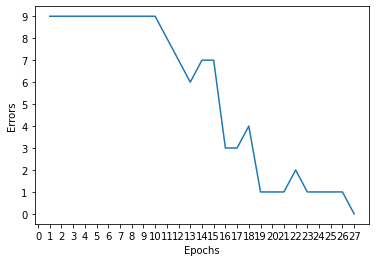

In [23]:
plt.plot(epochs, errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.xticks([x for x in range(len(epochs) + 1)], [x for x in range(len(epochs) + 1)])
plt.yticks([x for x in range(max(errors) + 1)], [x for x in range(max(errors) + 1)])
plt.show()

***
## Выводы

В результате проведения работы было исследовано функционирование простейшей нейронной сети (НС) на базе нейрона с нелинейной функцией активации.
Было проведено обучение НС по правилу Видроу-Хоффа.
Было получено минимальное число векторов, на котором нейронная сеть может обучиться.

***

## Контрольные вопросы
**1. Дайте определение персептрон и поясните алгоритм его функционирования.**

Перцептрон — математическая или компьютерная модель восприятия информации мозгом (кибернетическая модель мозга).
Перцептрон состоит из трёх типов элементов, а именно: поступающие от датчиков сигналы передаются ассоциативным элементам, а затем реагирующим элементам.
Таким образом, перцептроны позволяют создать набор «ассоциаций» между входными стимулами и необходимой реакцией на выходе.
Перцептрон классифицируется как простейшая нейронная сеть, позволяющая решать задачу классификации.

**2. Приведите функции активации НС и их производные.**

Функция активации определяет выходное значение нейрона в зависимости от результата взвешенной суммы входов и порогового значения.
Примеры функций активации и их производные:

 * Ступенчатая

$$f(net)= \left\{
\begin{array}{ll}
      1 & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.$$
$$f(net)= \left\{
\begin{array}{ll}
      ? & net = 0 \\
      0 & net \neq 0 \\
\end{array}
\right.$$

 * Сигмоида (логистическая)

$$f(net) = \dfrac{1}{1 + exp(-net)}$$
$$f'(net)=f(net)(1-f(net))$$

 * ReLu

$$f(net)= \left\{
\begin{array}{ll}
      net & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.$$
$$f'(net)= \left\{
\begin{array}{ll}
      net & net >= 0 \\
      0 & net < 0 \\
\end{array}
\right.$$


**3. Сформулируйте правило обучения Видроу — Хоффа.**

Правило обучения Видроу-Хоффа известно под названием дельта-правило.
Пусть вектор $X =x_1,x_2,...x_r,...x_m$ - вектор входных сигналов, а вектор $D =d_1,d_2,...d_r,...d_m$ - вектор сигналов, которые должны быть получены от перцептрона под воздействием входного вектора. $n$ - число нейронов. Полученный вектор выходных значений перцептрона: $Y =y_1,y_2,...y_r,...y_m$. Тогда можно определить вектор ошибки $E =e_1,e_2,...e_r,...e_m$, размерность которого совпадает с размерностью вектора выходных сигналов. Компоненты вектора ошибок определяются как разность между ожидаемым и реальным значением выходного сигнала перцептронного нейрона:

$$ E = D - Y $$

При таких обозначениях формулу для корректировки $j$-го веса $i$-го нейрона можно записать следующим образом:

$$ w_j(t+1) = w_j(t) + e_i x_j $$